# 이미지 파일 저장

In [2]:
from pymongo import MongoClient
from gridfs import GridFS
from bson.objectid import ObjectId
from gridfs import GridFSBucket

In [3]:
#mongodb에 python_test데이터베이스에 접속
db = MongoClient().python_test

In [4]:
#python_test에 파일을 저장할 GridFS객체 생성
fs = GridFS(db)

In [11]:
import urllib.request
#다운로드 받을 이미지 URL
url= "https://blog.kakaocdn.net/dn/kEgOr/btqGdQJLJ4z/cXoUraqRtnKyvkeHnNgjgK/img.jpg"

In [12]:
#이미지 확장자 리턴
image_type=url.split(".")[-1]
image_type

'jpg'

In [13]:
#이미지 타입 설정
content_type="image/{}".format(image_type)
content_type

'image/jpg'

In [16]:
#이미지의 이름 리턴
image_name=url.split("/")[-1]
image_name

'img.jpg'

In [17]:
#이미지의 내용 읽어서 image에 저장
image=urllib.request.urlopen(url).read()
image

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe2\x02\x1cICC_PROFILE\x00\x01\x01\x00\x00\x02\x0clcms\x02\x10\x00\x00mntrRGB XYZ \x07\xdc\x00\x01\x00\x19\x00\x03\x00)\x009acspAPPL\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-lcms\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\ndesc\x00\x00\x00\xfc\x00\x00\x00^cprt\x00\x00\x01\\\x00\x00\x00\x0bwtpt\x00\x00\x01h\x00\x00\x00\x14bkpt\x00\x00\x01|\x00\x00\x00\x14rXYZ\x00\x00\x01\x90\x00\x00\x00\x14gXYZ\x00\x00\x01\xa4\x00\x00\x00\x14bXYZ\x00\x00\x01\xb8\x00\x00\x00\x14rTRC\x00\x00\x01\xcc\x00\x00\x00@gTRC\x00\x00\x01\xcc\x00\x00\x00@bTRC\x00\x00\x01\xcc\x00\x00\x00@desc\x00\x00\x00\x00\x00\x00\x00\x03c2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [18]:
#이미지 파일을 저장할 객체 생성
bucket = GridFSBucket(db)

In [19]:
#이미지 파일을 GridFS에 저장할 객체 grid_in생성
grid_in = bucket.open_upload_stream(
image_name, metadata={"contentType":content_type})

In [20]:
#이미지 내용을 GridFS에 저장
grid_in.write(image)

In [21]:
#이미지 저장 종료
grid_in.close()

# MongoDB에 저장된 이미지 조회

In [22]:
from PIL import Image
import urllib.request
from io import BytesIO

In [23]:
#mongodb에 python_test 데이터베이스에 접속
db = MongoClient().python_test

In [24]:
#python_test에 파일을 저장할 GridFS객체 생성
fs = GridFS(db)

In [25]:
#GridFS에 저장된 데이터 정보 조회
db.fs.files.find()

In [26]:
#GridFS에 저장된 데이터 정보 조회
list(db.fs.files.find())

[{'_id': ObjectId('608f545d103099fcaeb3cb97'),
  'filename': 'text.txt',
  'md5': '0b97c2704cfb0e1892bb47a0b62bef96',
  'chunkSize': 261120,
  'length': 35,
  'uploadDate': datetime.datetime(2021, 5, 3, 1, 39, 41, 817000)},
 {'_id': ObjectId('608f5b19103099fcaeb3cb99'),
  'filename': 'text.txt',
  'md5': '0b97c2704cfb0e1892bb47a0b62bef96',
  'chunkSize': 261120,
  'length': 35,
  'uploadDate': datetime.datetime(2021, 5, 3, 2, 8, 25, 859000)},
 {'_id': ObjectId('608f5c5c103099fcaeb3cb9b'),
  'filename': 'text.txt',
  'md5': '0b97c2704cfb0e1892bb47a0b62bef96',
  'chunkSize': 261120,
  'length': 35,
  'uploadDate': datetime.datetime(2021, 5, 3, 2, 13, 48, 348000)},
 {'_id': ObjectId('608f6249103099fcaeb3cb9e'),
  'filename': 'text.txt',
  'md5': '0b97c2704cfb0e1892bb47a0b62bef96',
  'chunkSize': 261120,
  'length': 35,
  'uploadDate': datetime.datetime(2021, 5, 3, 2, 39, 5, 598000)},
 {'_id': ObjectId('608f7f7dba2c7ff8f4523c23'),
  'filename': '4ec12286827b12af3519749e54c8864a.jpg',
  'me

In [37]:
#GridFS에 저장된 1번째 데이터 조회
file_detail=db.fs.files.find()[6]
file_detail

{'_id': ObjectId('608fac56a2a76549140a77e9'),
 'filename': 'img.jpg',
 'metadata': {'contentType': 'image/jpg'},
 'chunkSize': 261120,
 'md5': '8768ac78d67c512ed599803aaf172752',
 'length': 60199,
 'uploadDate': datetime.datetime(2021, 5, 3, 7, 55, 36, 439000)}

In [39]:
#파일명이 일치하는 마지막 파일의 내용을 가져올 객체f 리턴
f=fs.get_last_version(filename=file_detail["filename"])

In [40]:
data=f.read()
data

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe2\x02\x1cICC_PROFILE\x00\x01\x01\x00\x00\x02\x0clcms\x02\x10\x00\x00mntrRGB XYZ \x07\xdc\x00\x01\x00\x19\x00\x03\x00)\x009acspAPPL\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-lcms\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\ndesc\x00\x00\x00\xfc\x00\x00\x00^cprt\x00\x00\x01\\\x00\x00\x00\x0bwtpt\x00\x00\x01h\x00\x00\x00\x14bkpt\x00\x00\x01|\x00\x00\x00\x14rXYZ\x00\x00\x01\x90\x00\x00\x00\x14gXYZ\x00\x00\x01\xa4\x00\x00\x00\x14bXYZ\x00\x00\x01\xb8\x00\x00\x00\x14rTRC\x00\x00\x01\xcc\x00\x00\x00@gTRC\x00\x00\x01\xcc\x00\x00\x00@bTRC\x00\x00\x01\xcc\x00\x00\x00@desc\x00\x00\x00\x00\x00\x00\x00\x03c2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [41]:
from IPython.display import display

In [44]:
#data의 내용을 이미지로 변환해서 image에 저장
image = Image.open(BytesIO(data))

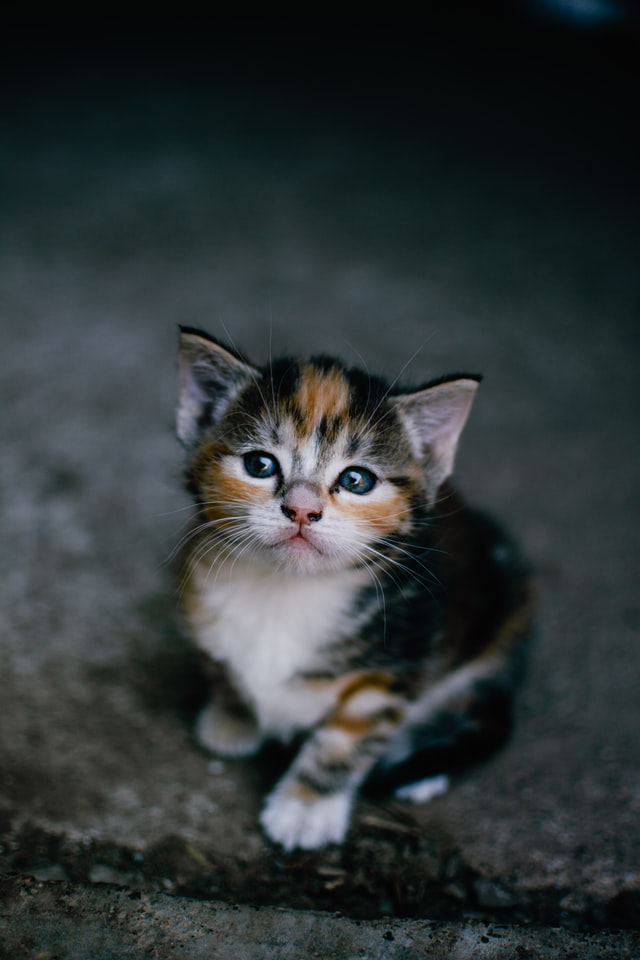

In [43]:
#image출력
display(image)